# Homework 3 - Immigration, the stock market, and GDP

Following tasks were accomplished :
* Installed the wbdata package for API access to Worldbank data.
* Explored the databases Population estimates and projections, Global Financial Development, and World Development Indicators using search_indicators() function.
* Got data on GDP per capita growth (annual %), Net immigration and Stock market return (%, year-on-year) as a dataframe.
* Explored the data and noted the issues.
* Cleaned and combined the data.
* What is the correlation between the GDP and net immigration and stock market returns.

### Packages Required :
Import the package 'wbdata' which has APIs that give access to World Bank Data.

For this, Anaconda Navigator didn't have 'wbdata' as a package listed. So, a normal pip install was done from the terminal.

The 'wbdata' package gives methods to access data.

https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata

http://wbdata.readthedocs.io/en/latest/

pandas package is imported to work with dataframes.

In [6]:
import wbdata
import pandas

Some warnings while running the code could be ignored because the output still is correct and as needed.

In [140]:
import warnings
warnings.filterwarnings('ignore')

To make a multi-line output possible.

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

The 'get_source()' method returns all the databases that are present in World Bank. 

In [136]:
#wbdata.get_source()

In [18]:
wbdata.get_source(40)

40	Population estimates and projections


### GDP per capita growth (annual %) Data :
For the data to be accessed, an indicator needs to be specified as a parameter of get_dataframe() function. These indicators could be found using the search_indicators() function. A search string is passed as parameter to the function and it returns a list of all possible values(indicators).

Using the indicator acquired here, the data for GDP per capita growth (annual %) can be stored in a dataframe : df_GDP.

The get_dataframe() function is used to the data in form of a dataframe by specifying the Indicator along with the column name, country for which to retrieve the data and convert the date field to a datetime object.

In [28]:
wbdata.search_indicators(query = "gdp per capita growth")

NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)
NV.AGR.PCAP.KD.ZG	Real agricultural GDP per capita growth rate (%)


In [37]:
df_GDP = wbdata.get_dataframe({"NY.GDP.PCAP.KD.ZG":"GDP per capita growth (annual %)"}, country="USA", convert_date=True)

The describe() function could be used to give an overview of the dataframe and helps in identifying several elements such as the min, max and mean of the dataframe.

In [138]:
df_GDP.describe()

,GDP per capita growth (annual %)
count,56.000000
mean,2.041225
std,2.001837
min,-3.624124
25%,0.937537
50%,2.105537
75%,3.276345
max,6.334428


### Stock Market Returns Data :
Stock Market Return is a year on year change in percentage(increase or decrease) in the stock market of the US. The search_indicator function is used here to search for the stock market indicator. The get_dataframe() method is used in a similar way as before to return the dataframe consisting of the values for stock market returns. 

In [44]:
wbdata.search_indicators("Stock Market return")

GFDD.OM.02	Stock market return (%, year-on-year)


In [48]:
df_Stock_Market = wbdata.get_dataframe({"GFDD.OM.02":"Stock market return"}, country="USA", convert_date=True)

The describe() function could be used to give an overview of the dataframe and helps in identifying several elements such as the min, max and mean of the dataframe.

In [51]:
df_Stock_Market.describe()

,Stock market return
count,55.000000
mean,7.623636
std,13.213378
min,-22.950000
25%,-1.080000
50%,8.550000
75%,17.575000
max,34.050000


### Total Population Data :

The total poulation of US is to be found. 
The data on total population of the US is required because to find the percentage of Immigrants from the total population.

This gives the chance to calculate the percentage of immigrants in the total population.

In [147]:
wbdata.search_indicators("Population, Total")

SP.POP.TOTL	Population, total


In [159]:
df_get_pop = wbdata.get_dataframe({"SP.POP.TOTL":"Total Population"}, country="USA", convert_date=True)

### Net Migrants Data :

The Net Migrants data gives the total number of migrants in a specific period of time. It is not given for all years and is recorded in a duration of once in 5 years. 

The indicator for the Migration is searched for using the search_indicators() function.


In [151]:
wbdata.search_indicators("Net Migration")

SM.POP.NETM	Net migration


In [56]:
df_get_Migrate = wbdata.get_dataframe({"SM.POP.NETM":"Net Migration"}, country="USA", convert_date=True)

### Visual Representation of the Data :

In [82]:
%matplotlib inline

### Data Cleaning - 

#### 1) Reversing the order of Data :
The data in dataframes is in the reverse order where the latest data is at the first and older data follows. When plotting the values, we could use the reversed order. The order of data needs to be reversed to display older data first and newer data later down, this might be useful when plotting using matplotlib(). 

In [77]:
df_New_Pop = df_get_pop[::-1]

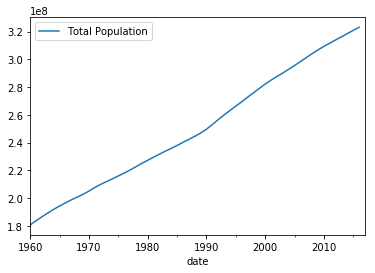

In [78]:
df_New_Pop.plot.line()

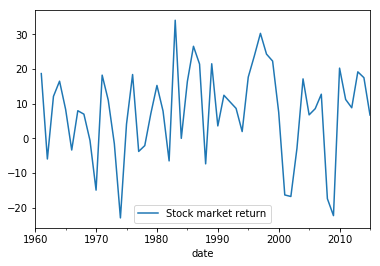

In [79]:
df_New_Stock = df_Stock_Market[::-1]
df_New_Stock.plot.line()

#### 2) Drop The Migration Data has multiple empty records, so inorder to clean the dataset, we could drop all the empty rows.

Using the dropna() function on the Dataframe, we drop the unwanted empty rows in the Dataframe.


In [94]:
df_migration_data=df_get_Migrate.dropna(axis = 0)

### Issues with Data :

The main issues with the Data were that the data for Migrants population was not complete and was not in a % format so as to compare it with the rest of the values.

The Immigrant % of the total population could be found out by dividing the Net Migration data

In [141]:
df_migration_data['Ratio of Immigration'] = ((df_migration_data['Net Migration']/df_New_Pop['Total Population'])*100)

A new Dataframe is created to hold all the neccessary data required, "Immigrant % of Population","GDP per capita growth (annual %)" and "Stock market return"

In [156]:
df_final = pandas.DataFrame(data = {"Immigrant % of Population":df_migration_data['Ratio of Immigration'],"GDP per capita growth (annual %)":df_GDP['GDP per capita growth (annual %)'],"Stock market return":df_Stock_Market['Stock market return']})

Due to the immigration data which is available for only specific years, that is a term of 5 years, the GDP and Stock market returns data should be matched with it and hence the empty values need to be removed from the final DataFrame as well.

In [158]:
df_final.dropna(axis=0)

,GDP per capita growth (annual %),Immigrant % of Population,Stock market return
date,,,
1962-01-01,4.480669,0.980644,-5.96
1967-01-01,1.389951,0.779754,7.96
1972-01-01,4.142406,1.400930,11.00
1977-01-01,3.561747,1.782977,-3.78
1982-01-01,-2.841549,1.468618,-6.51
1987-01-01,2.541097,1.415145,21.41
1992-01-01,2.129114,1.760843,10.52
1997-01-01,3.236587,3.158574,30.27
2002-01-01,0.846126,1.810181,-16.77


### Correlation between the Data  :

The correlation bewteen the data could be found out by using the corr() function available in pandas. This gives an overview of which data is correlated and by how much.

The maximum possible correlation is 1.0, which means that the data perfectly correlates with one another. The correlation might be between 0.0 - 1.0.


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

In [154]:
df_final.corr()

,GDP per capita growth (annual %),Ratio of Immigration,Stock market return
GDP per capita growth (annual %),1.000000,0.085958,0.320460
Ratio of Immigration,0.085958,1.000000,0.430157
Stock market return,0.320460,0.430157,1.000000



Based on the following, the stock market returns is more correlated to the GDP per capita growth (annual %).
This might be due to the following 
#### 1) 1982-01-01 :
The GDP per capita is in the negative during this time and the stock market return is also in the Negative. The Immigration is still on the higher side and is in the positive.

#### 2) 2002-01-01 : 
The GDP is on the lower positive side and the stock market is in the negative because of the economic recession during 2001 and 2002. The immigration % is still on the higher side.

#### 3) 1997-01-01 :
The GDP per capita is on the higher side and the stock market was blooming with a 30.27% year on year increase. The 1990's were one of the best decades for the US market due to the outburst of several technological advancements and also due to the bloom of the IT industry. The immigration was at its peak during this time and may have contibuted to the overall GDP per capita.

Higher stock market returns means that the companies have good flow of cash or they could take loans at cheaper rates, this leads to higher investments to expand operations which would mean more jobs that directly impact the GDP.

#### Correlation between Immigration and Stock market returns :

In the US, the concept of Immigration can be considered based on skill and can be split as immigration of highly skilled labor and of low skilled labor. The immigration of highly skilled labor is believed to lead to higher innovation in any Industry and growth of the same. This ultimatley leads to the betterment of the Industry and has a impact on its performance in the stock market. This might be a reason for higher correlation between the stock market returns and the Immigrant %.

#### Other Factors : 
There are certain discrepancies in the data above for example in the year 1977, although the GDP per capita is positive, the stock market performance was not the same and was in the negative.
Moreover, there would be multiple factors affecting the GDP per capita growth of any given country. Only considering two of the factors might not give the whole idea of the bigger picture. These other factors if included would give a clearer picture about how they are correlated with the GDP per capita growth.

https://www.investopedia.com/ask/answers/033015/how-does-stock-market-affect-gross-domestic-product-gdp.asp

https://www.forbes.com/sites/stuartanderson/2016/10/02/3-reasons-why-immigrants-key-to-economic-growth/#6d01c5807dab



